# Examples comparing output from Seaborn and Starborn

In [139]:
import pandas as pd
import altair as alt
import vega_datasets
import seaborn as sns
import starborn as star

In [140]:
from importlib import reload
reload(star.core)
reload(star)

<module 'starborn' from '/Users/schofield/Dropbox/PythonCharmers/Code/starborn/starborn/__init__.py'>

In [3]:
cars = vega_datasets.data.cars()

## Joint plots

/Users/schofield/miniconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/schofield/miniconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


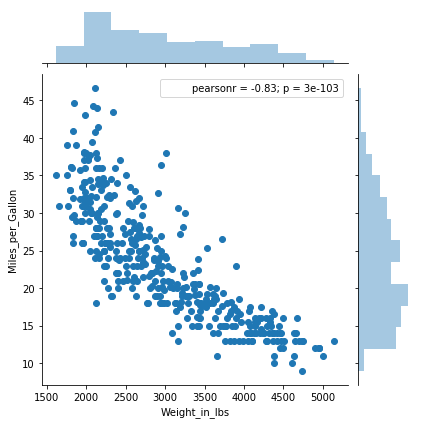

In [4]:
sns.jointplot('Weight_in_lbs', 'Miles_per_Gallon', cars)

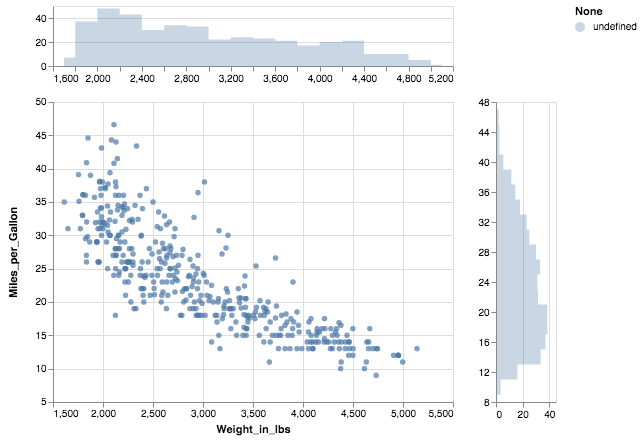

In [5]:
star.jointplot('Weight_in_lbs', 'Miles_per_Gallon', cars)

## Heat map

In [6]:
cars[:3]

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01


In [7]:
matrix = cars.pivot_table(columns='Cylinders',
                          index='Origin',
                          aggfunc='size').fillna(0).astype(int)

In [8]:
matrix

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
USA,0,72,0,74,108


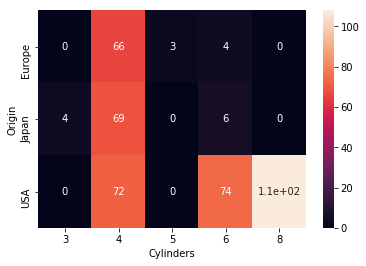

In [9]:
sns.heatmap(matrix, annot=True)

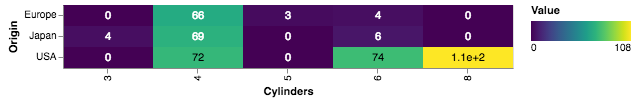

In [10]:
star.heatmap(matrix, annot=True, fmt='.2')

In [11]:
mpg = cars.pivot_table(values='Miles_per_Gallon',
                       index='Year',
                       columns='Cylinders')

In [12]:
mpg

Cylinders,3,4,5,6,8
Year,,,,,
1970-01-01,NaN,25.285714,NaN,20.500000,14.111111
1971-01-01,NaN,27.461538,NaN,18.000000,13.428571
1972-01-01,19.0,23.428571,NaN,NaN,13.615385
1973-01-01,18.0,22.727273,NaN,19.000000,13.200000
1974-01-01,NaN,27.800000,NaN,17.857143,14.200000
1975-01-01,NaN,25.250000,NaN,17.583333,15.666667
1976-01-01,NaN,26.766667,NaN,20.000000,14.666667
1977-01-01,21.5,29.107143,NaN,19.500000,16.000000
1978-01-01,NaN,29.576471,20.3,19.066667,19.050000


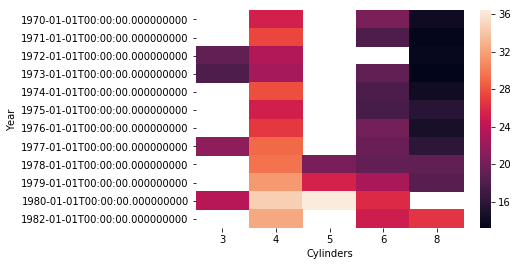

In [13]:
sns.heatmap(mpg)

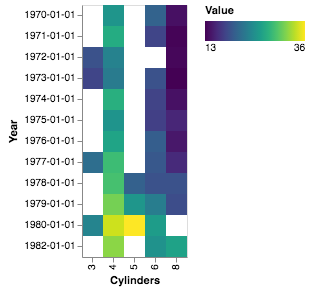

In [14]:
star.heatmap(mpg)

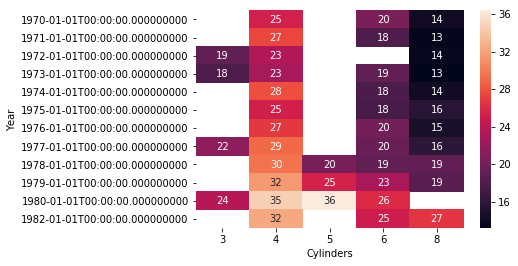

In [15]:
sns.heatmap(mpg, annot=True)

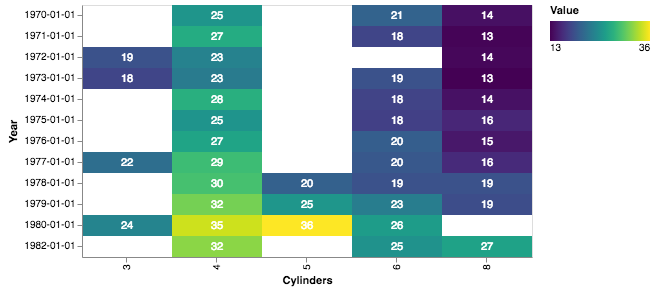

In [16]:
star.heatmap(mpg, annot=True, fmt='.2g')

## Strip plot

In [14]:
tips = sns.load_dataset("tips")
tips[:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


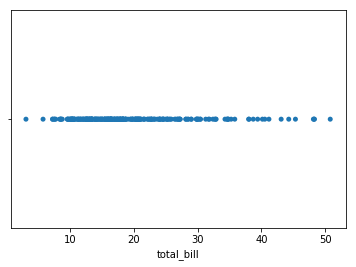

In [18]:
sns.stripplot(x=tips["total_bill"])

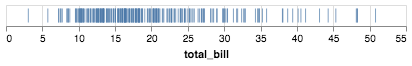

In [19]:
star.stripplot(x=tips['total_bill'])

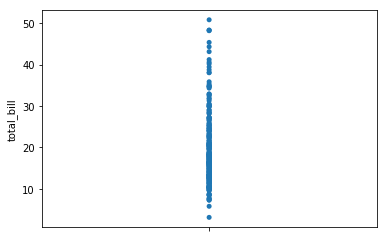

In [20]:
sns.stripplot(y=tips["total_bill"])

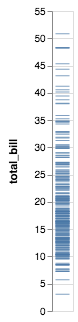

In [21]:
star.stripplot(y=tips["total_bill"])

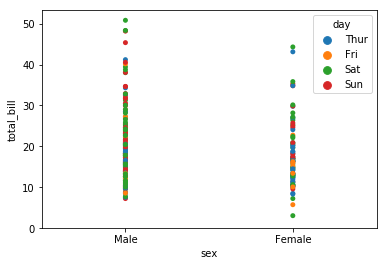

In [22]:
sns.stripplot(x="sex", y="total_bill", hue="day",
          data=tips)

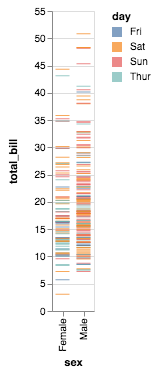

In [23]:
star.stripplot(x="sex", y="total_bill", hue="day",
               data=tips)

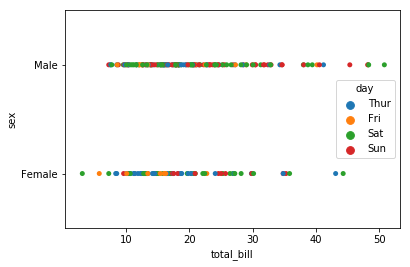

In [24]:
sns.stripplot(y="sex", x="total_bill", hue="day",
          data=tips)

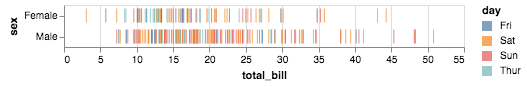

In [25]:
star.stripplot(y="sex", x="total_bill", hue="day",
          data=tips)

## Pair plots

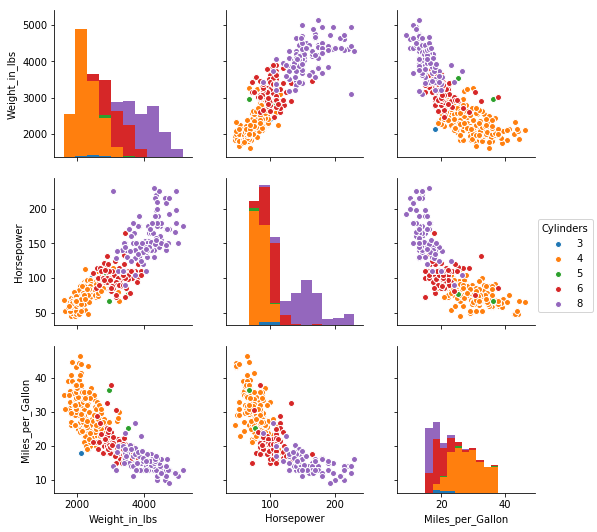

In [4]:
sns.pairplot(cars,
             hue='Cylinders',
             vars=['Weight_in_lbs', 'Horsepower', 'Miles_per_Gallon'])

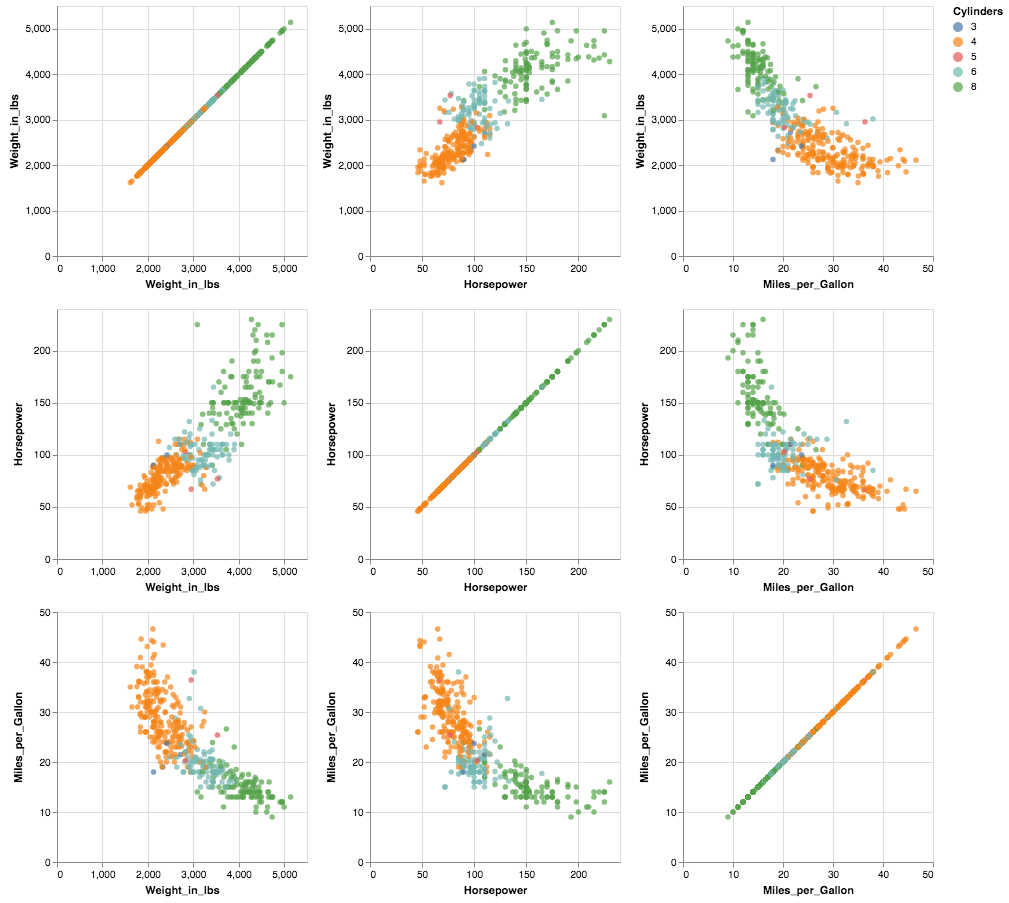

In [5]:
# TODO: diagonals should be histograms or kde plots
star.pairplot(cars,
              hue='Cylinders',
              vars=['Weight_in_lbs', 'Horsepower', 'Miles_per_Gallon'])

## Bar plots

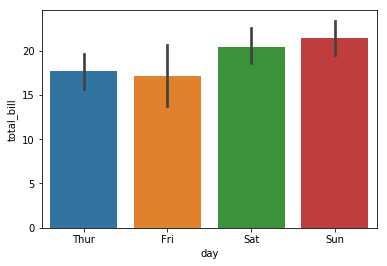

In [871]:
sns.barplot(x="day", y="total_bill", data=tips)

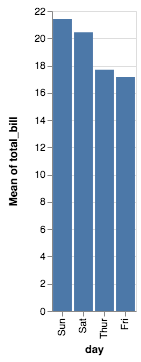

In [876]:
star.barplot(x="day", y="total_bill", data=tips)

In [877]:
# The ordering of the bars is the natural ordering (of occurrences in the data)
tips.groupby('day', sort=False)['total_bill'].mean()

day
Sun     21.410000
Sat     20.441379
Thur    17.682742
Fri     17.151579
Name: total_bill, dtype: float64

In [878]:
# How does Pandas groupby with sort=True get the ordering right??
tips.groupby('day', sort=True)['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

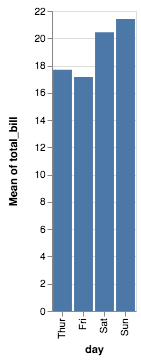

In [879]:
star.barplot(x="day", y="total_bill", data=tips, order=['Thur', 'Fri', 'Sat', 'Sun'])

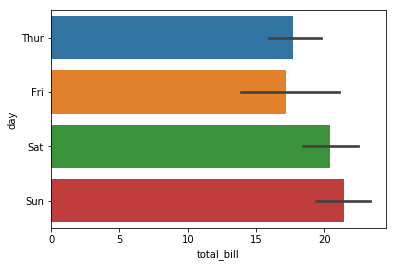

In [880]:
sns.barplot(y="day", x="total_bill", data=tips)

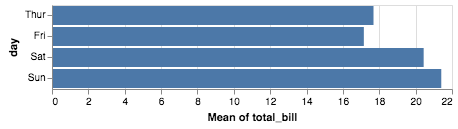

In [881]:
star.barplot(y="day", x="total_bill", data=tips, order=['Thur', 'Fri', 'Sat', 'Sun'], orient='h')

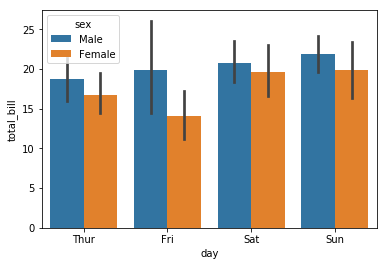

In [882]:
sns.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v')

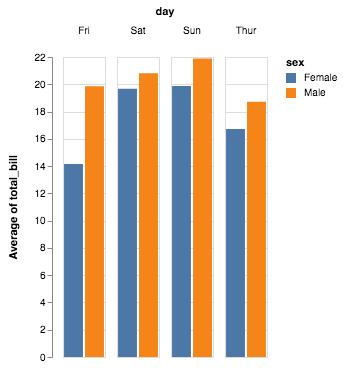

In [870]:
# Order of colours is swapped
star.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v')

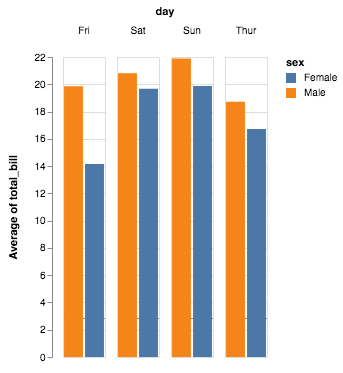

In [841]:
# Order of colours is swapped
star.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v', hue_order=['Male', 'Female'])

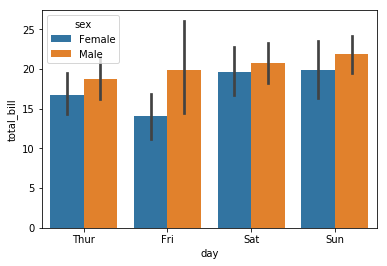

In [842]:
sns.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v', hue_order=['Female', 'Male'])

In [889]:
# We can't currently change the order of the labels:
try:
    star.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v', order=['Thur', 'Fri', 'Sat', 'Sun'])
except Exception as e:
    print(type(e), e)

<class 'ValueError'> custom order is not implemented for grouped bar charts (when `hue` is not `None`). Vega-Lite current does not support sorting of facets ...


In [800]:
# TODO: allow setting hue_order
# TODO: remove extra axis labels

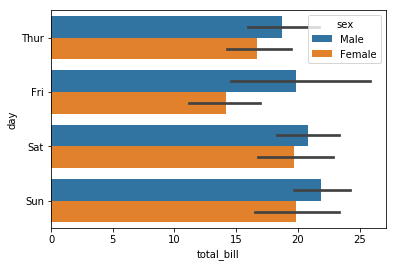

In [885]:
sns.barplot(x="total_bill", y="day", data=tips, hue='sex')

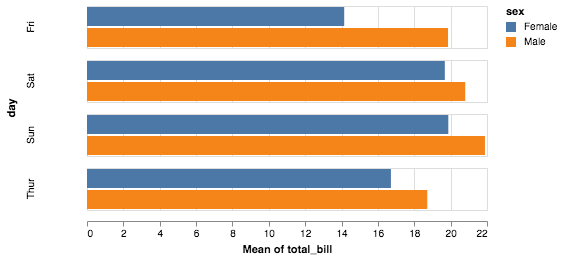

In [886]:
# TODO: make order configurable
# TODO: remove extra axis labels
# TODO: automatically infer orientation
# TODO: add confidence intervals; make estimator function configurable
star.barplot(y="day", x="total_bill", data=tips, hue='sex', orient='h')

## Box plots

In [270]:
population_url = vega_datasets.data.population.url

In [271]:
population = pd.read_json(population_url)

In [122]:
population[:3]

,age,people,sex,year
0,0,1483789,1,1850
1,0,1450376,2,1850
2,5,1411067,1,1850


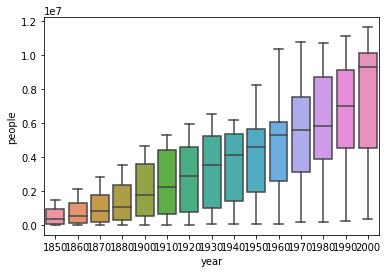

In [176]:
sns.boxplot(data=population, x='year', y='people', orient='v')

In [854]:
# We can change the order of the labels with:
c = star.barplot(x="day", y="total_bill", data=tips, hue='sex', orient='v') #, order=['Thur', 'Fri', 'Sat', 'Sun'])

In [856]:
c.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'data': {'url': 'altair-data-645686bf-4164-47df-b954-a6c0b3704df6.json',
  'format': {'type': 'json'}},
 'mark': 'bar',
 'encoding': {'color': {'type': 'nominal', 'field': 'sex'},
  'column': {'type': 'nominal', 'field': 'day'},
  'x': {'type': 'nominal',
   'axis': {'domain': False, 'labels': False, 'ticks': False, 'title': ''},
   'field': 'sex'},
  'y': {'type': 'quantitative',
   'aggregate': 'average',
   'field': 'total_bill'}},
 '$schema': 'https://vega.github.io/schema/vega-lite/v2.4.1.json'}

In [807]:
c = star.boxplot(data=population, x='year', y='people')

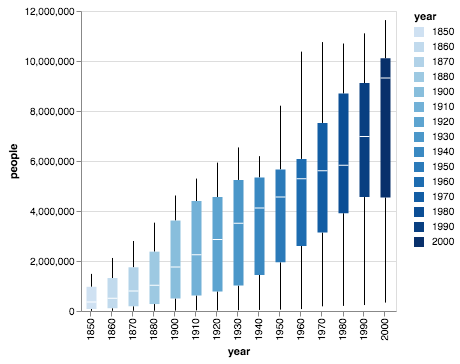

In [809]:
c

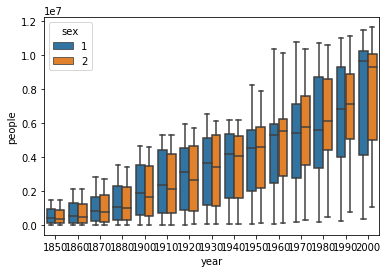

In [504]:
sns.boxplot(data=population, x='year', y='people', hue='sex')

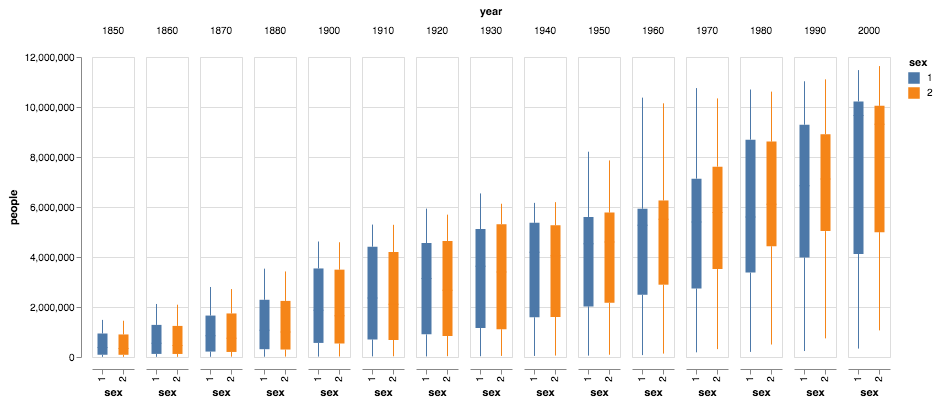

In [505]:
star.boxplot(data=population, x='year', y='people', hue='sex')

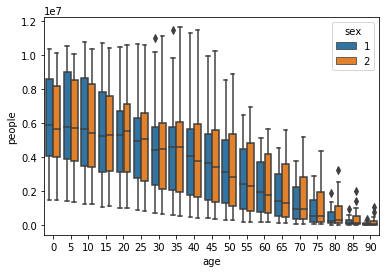

In [506]:
sns.boxplot(data=population, x='age', y='people', hue='sex')

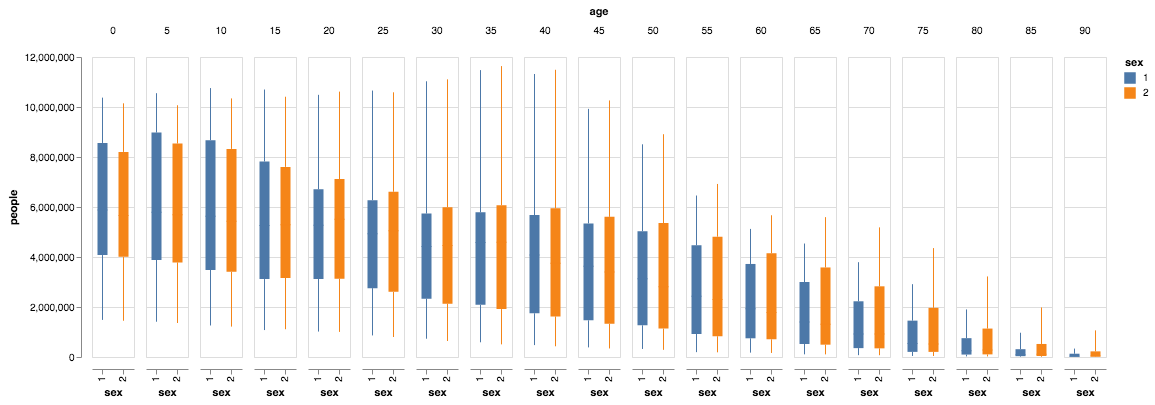

In [858]:
star.boxplot(data=population, x='age', y='people', hue='sex')

## Violin plots

Is it possible to create these in Altair 2.0?

With Altair 1.x: https://github.com/jakevdp/altair-examples/blob/master/notebooks/MarathonData.ipynb

In [4]:
marathon_url = 'https://raw.githubusercontent.com/jakevdp/altair-examples/master/data/NYCM2008.csv'

In [94]:
import pandas as pd
marathon_df = pd.read_csv(marathon_url)
marathon_df.head()

,age,gender,split,final
0,31,M,1:06:07,2:08:43
1,32,M,1:06:06,2:09:07
2,30,M,1:06:06,2:11:22
3,39,M,1:06:06,2:13:10
4,30,M,1:06:06,2:13:33


In [95]:
marathon_df['split'].iloc[0]

'1:06:07'

In [96]:
import datetime as dt

In [97]:
def seconds(val: str) -> int:
    """
    Convert e.g. '1:06:07' into seconds
    """
    hours, minutes, seconds = val.split(':')
    return (3600 * int(hours) +
            60 * int(minutes) +
            int(seconds))

In [98]:
marathon_df['split_sec'] = marathon_df['split'].apply(seconds)
marathon_df['final_sec'] = marathon_df['final'].apply(seconds)

In [99]:
marathon_df['split_frac'] = (marathon_df.final_sec - marathon_df.split_sec) / marathon_df.split_sec - 1

In [100]:
marathon_df.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,31,M,1:06:07,2:08:43,3967,7723,-0.053189
1,32,M,1:06:06,2:09:07,3966,7747,-0.046646
2,30,M,1:06:06,2:11:22,3966,7882,-0.012607
3,39,M,1:06:06,2:13:10,3966,7990,0.014624
4,30,M,1:06:06,2:13:33,3966,8013,0.020424


In [101]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

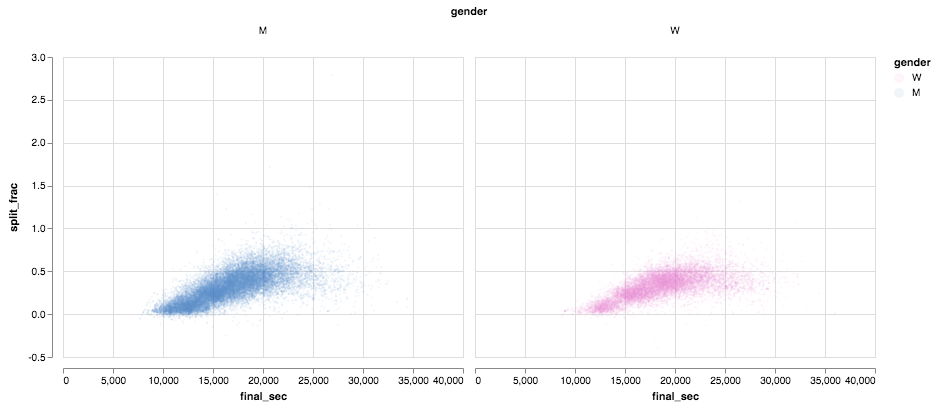

In [102]:
# alt.Chart(marathon_df).mark_circle(opacity=0.1, size=4).encode(
#     x='final_sec',
#     y='split_frac',
#     color=gender_color,
#     column='gender:N',
# )

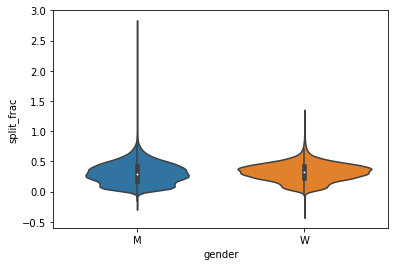

In [108]:
sns.violinplot(x='gender', y='split_frac', data=marathon_df)

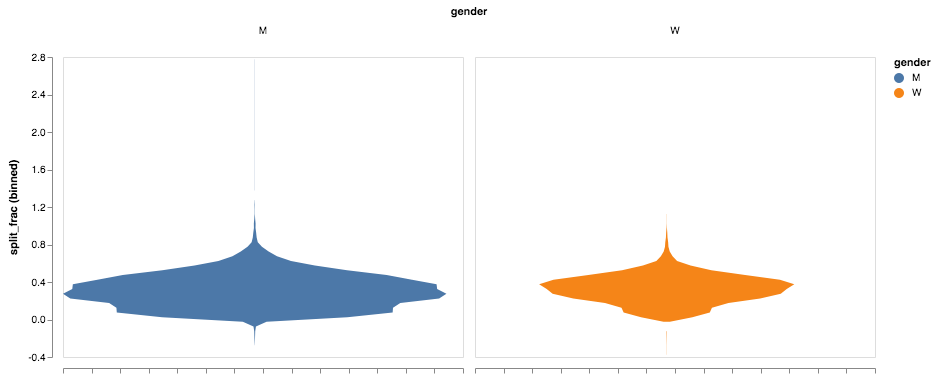

In [147]:
star.violinplot(x='gender', y='split_frac', data=marathon_df)

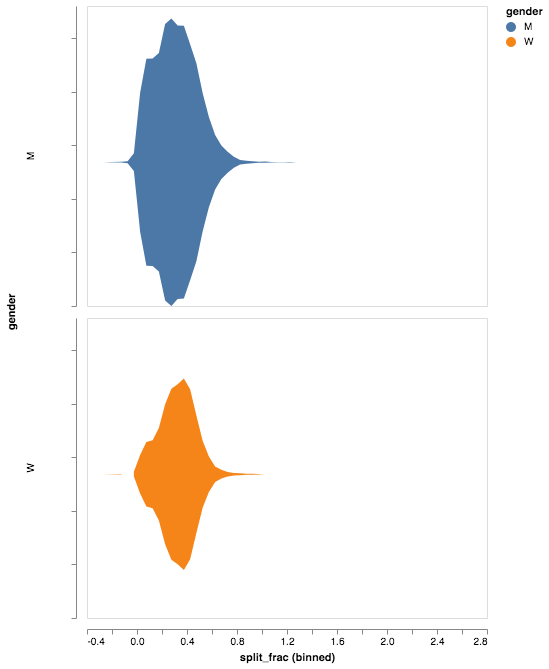

In [148]:
star.violinplot(y='gender', x='split_frac', data=marathon_df, orient='h')

In [160]:
movies_url = vega_datasets.data.movies.url

In [161]:
movies = pd.read_json(movies_url)

In [162]:
len(movies)

3201

In [163]:
movies[:3]

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,12-Jun-98,NaN,NaN,None,The Land Girls,NaN,146083.0,146083.0
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,7-Aug-98,NaN,NaN,None,"First Love, Last Rites",NaN,10876.0,10876.0
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,28-Aug-98,NaN,NaN,None,I Married a Strange Person,NaN,203134.0,203134.0


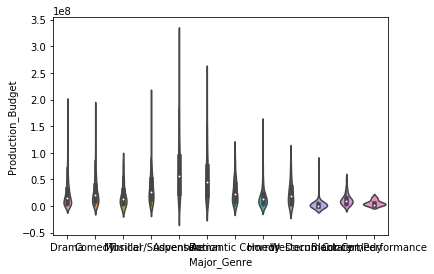

In [167]:
sns.violinplot(x='Major_Genre', y='Production_Budget', data=movies)

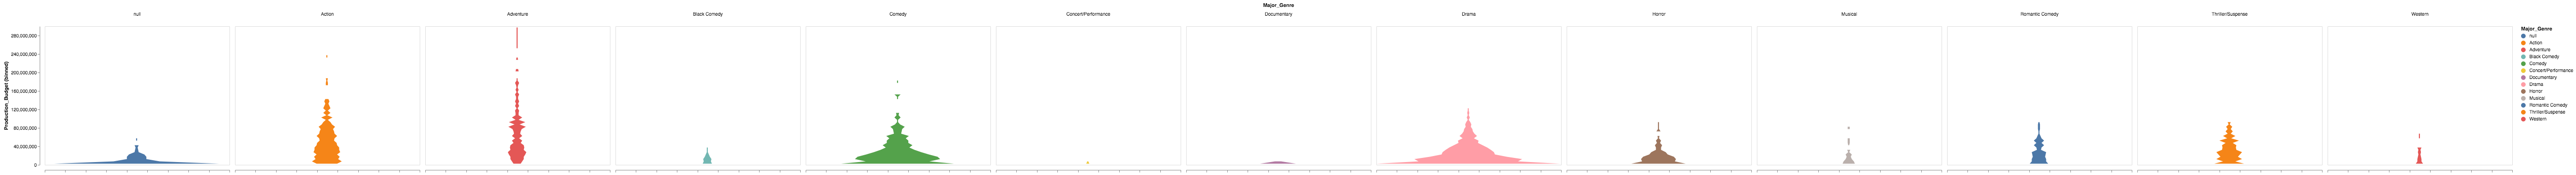

In [165]:
star.violinplot(x='Major_Genre', y='Production_Budget', data=movies_url)